In [41]:
import pandas as pd
import numpy as np

In [169]:
dataset = pd.read_csv('diabetes_datase.csv')
dataset.sample()

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
391,5,166,76,45.7,27,1


In [138]:
# dataset = dataset.drop(['Outcome'], axis=1)

In [168]:
dataset.sample()

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
1991,6,102,82,30.8,36,1


In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2000 non-null   int64  
 1   Glucose        2000 non-null   int64  
 2   BloodPressure  2000 non-null   int64  
 3   BMI            2000 non-null   float64
 4   Age            2000 non-null   int64  
 5   Outcome        2000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 93.9 KB


In [154]:
numerical = []
catgcols = []

for col in dataset.columns:
    if dataset[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in dataset.columns:
    if col in numerical:
        dataset[col].fillna(dataset[col].median(), inplace=True)
    else:
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [155]:
numerical

['BMI']

In [156]:
catgcols

['Pregnancies', 'Glucose', 'BloodPressure', 'Age', 'Outcome']

In [157]:
dataset['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [158]:
ind_col = [col for col in dataset.columns if col != 'Outcome']
dep_col = 'Outcome'

In [159]:
dataset[dep_col].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

Transformasi Dataset

In [160]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    dataset[col] = le.fit_transform(dataset[col])

In [161]:
dataset['Outcome'] = le.fit_transform(dataset['Outcome'])

In [162]:
x = dataset[ind_col] #Feature
y = dataset[dep_col] #Label

In [164]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,2,76,16,33.6,26,1
1,0,22,28,38.2,2,0
2,0,83,0,44.2,10,1
3,0,73,20,42.3,3,1
4,1,77,16,40.7,0,0


In [171]:
dataset.to_csv('diabetes_datase.csv',index=False)

In [172]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

Membuat Model Decision Tree

In [173]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.793125
akurasi data testing = 0.8 

confusion matrix : 
[[233  39]
 [ 41  87]]

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       272
           1       0.69      0.68      0.69       128

    accuracy                           0.80       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.80      0.80      0.80       400



Simulasi Model

In [174]:
input_data = (9,91,68,24.2,58)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Pasien Tidak Terkena Diabetes')
else:
    print ('Pasien Terkena Diabetes')

[0]
Pasien Tidak Terkena Diabetes


c:\Users\AFIF_IP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Visualisasi Pohon Keputusan

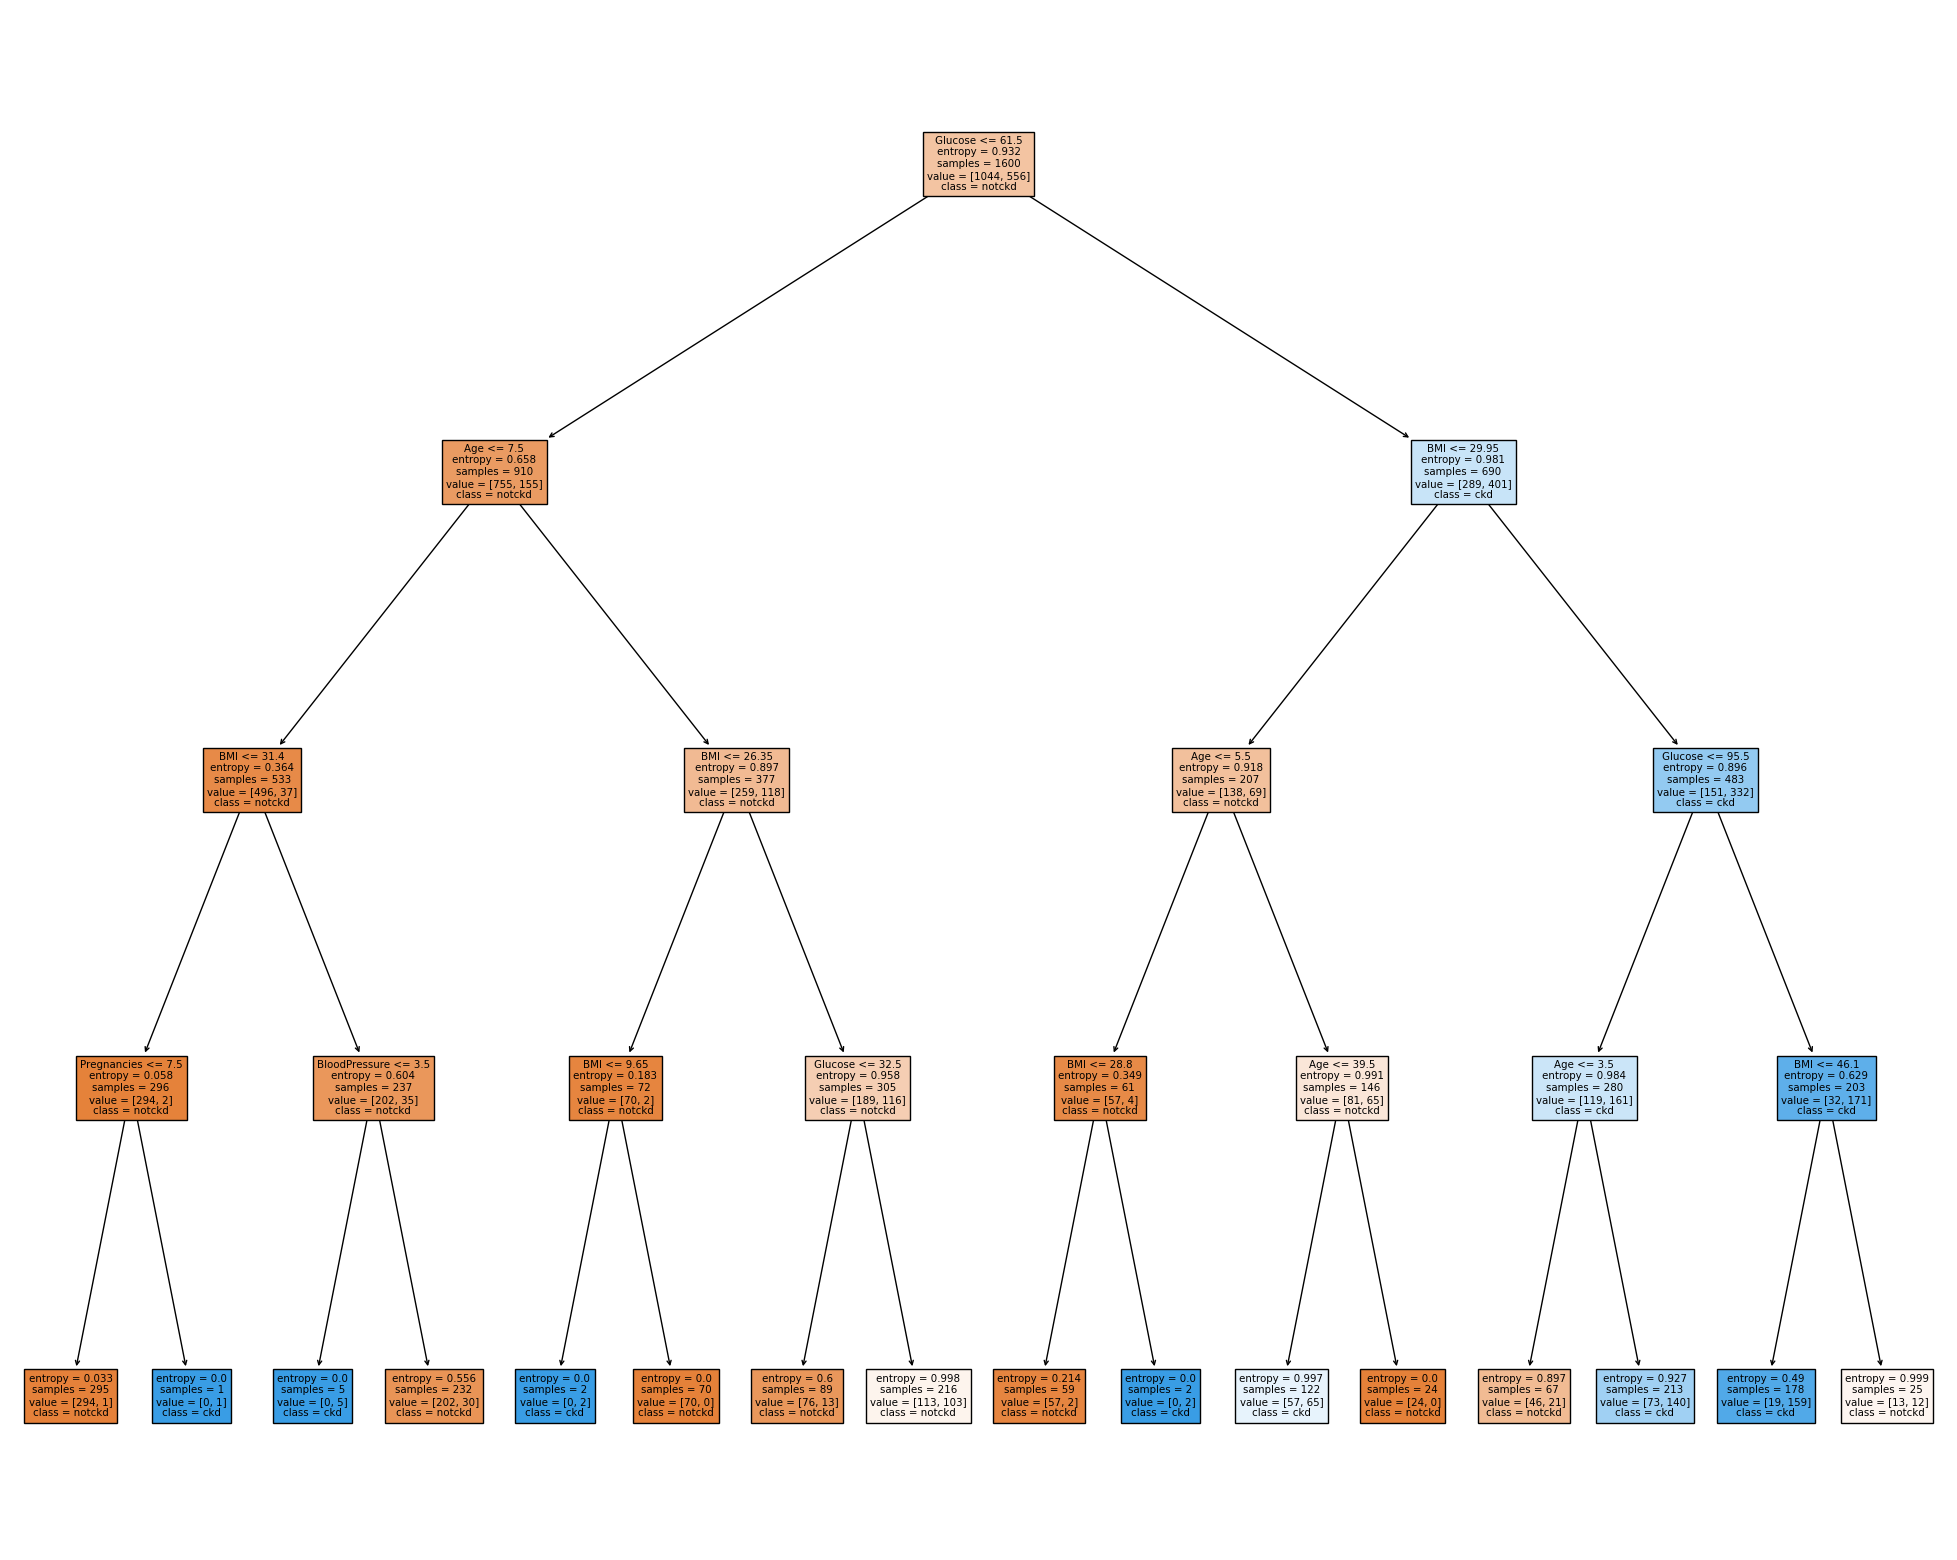

In [137]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['notckd','ckd'],
                   filled=True)